In [ ]:
pip install emoji

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from emoji import demojize
import re
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from emoji import demojize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv(r'/content/twitter_training.csv')

In [ ]:
df.head(5)

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [ ]:
df=df.iloc[:,2:]

In [ ]:
df.columns = ["Sentiment","Text"]

In [ ]:
df.head()

Sentiment                                               Text
0  Positive  I am coming to the borders and I will kill you...
1  Positive  im getting on borderlands and i will kill you ...
2  Positive  im coming on borderlands and i will murder you...
3  Positive  im getting on borderlands 2 and i will murder ...
4  Positive  im getting into borderlands and i can murder y...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  74681 non-null  object
 1   Text       73995 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Sentiment'].value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [ ]:
from nltk.stem import WordNetLemmatizer
def preprocess_sentiment(text):
    # Convert to lowercase
    text = text.lower()

    # Remove mentions (e.g., "@username")
    text_no_mentions = re.sub(r'@\w+', '', text)

    # Remove hashtags (e.g., "#word")
    text_no_mentions_no_hashtags = re.sub(r'#(\w+)', r'\1', text_no_mentions)

    # Convert emojis to text
    text_no_mentions_no_hashtags = demojize(text_no_mentions_no_hashtags)

    # Tokenize the text
    tokens = word_tokenize(text_no_mentions_no_hashtags)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [ ]:
import numpy as np
df['Preprocessed_text'] = df['Text'].apply(preprocess_sentiment)

In [ ]:
df[df['Sentiment']=="Irrelevant"].head(50)

Sentiment                                               Text  \
101  Irrelevant  Appreciate the (sonic) concepts / praxis Valen...   
102  Irrelevant  Appreciate the (sound) concepts / practices th...   
103  Irrelevant  Evaluate the (sound) concepts / concepts of Va...   
104  Irrelevant  Appreciate the (sonic) concepts / praxis Valen...   
105  Irrelevant  Appreciate by the ( sonic ) electronic concept...   
106  Irrelevant  Appreciate the (sonic) conversations / actions...   
125  Irrelevant  Loving these new @GhostLifestyle cans!! Anyone...   
126  Irrelevant  I love these new @ GhostLifestyle cans!! Every...   
127  Irrelevant  Love these new @ GhostLive cans!! Does anyone ...   
128  Irrelevant  Loving these new @GhostLifestyle cans!! Anyone...   
129  Irrelevant  Loving back these three new @GhostLifestyle ca...   
130  Irrelevant  do these new @GhostLifestyle<unk> They want dr...   
137  Irrelevant  How the hell are we into Halloween month alrea...   
138  Irrelevant  How the hell are we already into Halloween mon...   
139  Irrelevant  How the hell are we already in Halloween month?!.   
140  Irrelevant  How the hell are March into Halloween month al...   
141  Irrelevant  How the hell are pulling we into Halloween mon...   
142  Irrelevant  in the hell are we into Halloween month alread...   
221  Irrelevant  I'm in this @CBP video. @DHS_Wolf deceptively ...   
222  Irrelevant  I'm in this @ CBP video. @ DHS _ Wolf misleadi...   
223  Irrelevant  I am in this video by @ CBP. @ DHS _ Wolf dece...   
224  Irrelevant  I'm in this @CBP video. Somebody deceptively c...   
225  Irrelevant  I'm in fact this entire @CBP video. @DHS_Wolf ...   
226  Irrelevant  I'm in this protest video. BP deceptively cut ...   
263  Irrelevant  4 favorite games of all time. (thanks @317Slay...   
264  Irrelevant  4 favorite games of all time. (Thanks @ 317Sla...   
265  Irrelevant  4 favorite games of all time. (thanks to @ 317...   
266  Irrelevant  4 favorite games of all time. (thanks Mario an...   
267  Irrelevant  4 My favorite games of all time. ( thanks @317...   
268  Irrelevant  our favorite games of all time. (thanks @317Sl...   
335  Irrelevant  Stupid 19-year-olds who write bad poetry need ...   
336  Irrelevant  Stupid 19-year-olds who write bad poetry need ...   
337  Irrelevant  Stupid 19-year-olds who write bad poems need t...   
338  Irrelevant  Stupid 19-year-olds who write bad poetry need ...   
339  Irrelevant  Stupid 19 - year - olds who write bad poetry n...   
340  Irrelevant  Stupid 19-year-olds and write terrible poetry ...   
383  Irrelevant  Pretty Happy with this! I made these sub badge...   
384  Irrelevant  Pretty happy with it! I made these sub-badges ...   
385  Irrelevant  Pretty Happy with this! I made these subbids f...   
386  Irrelevant  Pretty Happy with this! I made these sub badge...   
387  Irrelevant  i Pretty Happy with this! I made these sub bad...   
388  Irrelevant                                                 is   
425  Irrelevant  Yasss!!! Co-Stream with @jimmysgotya  twitch.t...   
426  Irrelevant  Yasss!!! Co-stream with @ jimmysgotya twitch.t...   
427  Irrelevant  Yasss!!! Co-Stream with @ jimmysgotya-tch.tv /...   
428  Irrelevant  Yasss!!! Co-Stream with RhandlerR  twitch.tv/j...   
429  Irrelevant  2 Yasss!!! Co-Stream with RhandlerR  twitch.tv...   
430  Irrelevant                                              there   
491  Irrelevant  @Joltzdude139 Hey Joltz, im a big fan and seei...   
492  Irrelevant  @ Joltzdude139 Hey Joltz, I'm a big fan and wh...   

                                     Preprocessed_text  
101  appreciate ( sonic ) concept / praxis valenzue...  
102  appreciate ( sound ) concept / practice valenz...  
103  evaluate ( sound ) concept / concept valensela...  
104  appreciate ( sonic ) concept / praxis valenzue...  
105  appreciate ( sonic ) electronic concept / prax...  
106  appreciate ( sonic ) conversation / action kle...  
125  loving new can ! ! anyone else 

In [ ]:
df.head(10)

Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   
5  Positive  So I spent a few hours making something for fu...   
6  Positive  So I spent a couple of hours doing something f...   
7  Positive  So I spent a few hours doing something for fun...   
8  Positive  So I spent a few hours making something for fu...   
9  Positive  2010 So I spent a few hours making something f...   

                                   Preprocessed_text  
0                               coming border kill ,  
1                       im getting borderland kill ,  
2                      im coming borderland murder ,  
3                   im getting borderland 2 murder ,  
4                     im getting borderland murder ,  
5  spent hour making something fun . . . n't know...  
6  spent couple hour something fun ... n't know '...  
7  spent hour something fun ... n't know 'm huge ...  
8  spent hour making something fun . . . n't know...  
9  2010 spent hour making something fun . . . n't...

In [ ]:
data=df.head(500)
data1=df.head(500)
data2=df.head(500)
data3=df.head(500)
data4=df.head(500)
data5=df.head(500)
data6=df.head(500)

Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Create CountVectorizer instance
cv = CountVectorizer()

# Fit and transform the text data
count_matrix = cv.fit_transform(data['Preprocessed_text'].values.tolist())

# Extract individual features and add them as separate columns
for i in range(count_matrix.shape[1]):
    data[f'feature_{i+1}'] = count_matrix[:, i].toarray().ravel()

# Display the DataFrame
print(data)


Streaming output truncated to the last 5000 lines.
<ipython-input-17-5784361badc2>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'feature_{i+1}'] = count_matrix[:, i].toarray().ravel()
<ipython-input-17-5784361badc2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'feature_{i+1}'] = count_matrix[:, i].toarray().ravel()
<ipython-input-17-5784361badc2>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

      Sentiment                                               Text  \
0      Positive  I am coming to the borders and I will kill you...   
1      Positive  im getting on borderlands and i will kill you ...   
2      Positive  im coming on borderlands and i will murder you...   
3      Positive  im getting on borderlands 2 and i will murder ...   
4      Positive  im getting into borderlands and i can murder y...   
..          ...                                                ...   
496  Irrelevant  @Joltzdude139 v Joltz, im a big fan out seeing...   
497     Neutral  Guns, Love, and Tentacles is out now, and here...   
498     Neutral  Guns, Love, and Tentacles is out now, and here...   
499     Neutral  GB, Love, and Tentacles is out now, and here a...   
500     Neutral  Guns, Love, and Sex is out now, and here are 5...   

                                     Preprocessed_text  feature_1  feature_2  \
0                                 coming border kill ,          0          0   

<ipython-input-17-5784361badc2>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'feature_{i+1}'] = count_matrix[:, i].toarray().ravel()
<ipython-input-17-5784361badc2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'feature_{i+1}'] = count_matrix[:, i].toarray().ravel()
<ipython-input-17-5784361badc2>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['Preprocessed_text'].values.tolist())

In [ ]:
tfidf_array = tfidf_matrix.toarray()

# Assign the TF-IDF array to a DataFrame column
data1['tfidf'] = tfidf_array.tolist()
data1.head()

<ipython-input-19-f5af605a99cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tfidf'] = tfidf_array.tolist()


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text  \
0              coming border kill ,   
1      im getting borderland kill ,   
2     im coming borderland murder ,   
3  im getting borderland 2 murder ,   
4    im getting borderland murder ,   

                                               tfidf  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

Bi-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


processed_texts = data5['Preprocessed_text'].tolist()


vectorizer = CountVectorizer(ngram_range=(2, 2))

bigram_representations = vectorizer.fit_transform(processed_texts)
bigrams = vectorizer.get_feature_names_out()
bigram_vectors = bigram_representations.toarray()

data5['bigram']=bigram_vectors.tolist()
data5.head()


<ipython-input-20-f254c8706818>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['bigram']=bigram_vectors.tolist()


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text  \
0              coming border kill ,   
1      im getting borderland kill ,   
2     im coming borderland murder ,   
3  im getting borderland 2 murder ,   
4    im getting borderland murder ,   

                                              bigram  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [ ]:
for bigram in bigrams:
    print(bigram)

10 best
10 borderland
10 drop
10 en
10 get
10 great
10 last
10 never
10 turn
11 38
13 hour
13 year
16 come
1700 want
19 year
20 200
20 game
20 great
20 hour
20 like
200 great
2010 10
2010 spent
2011 borderland
2016 cool
2018 gun
20th game
2500 loot
2usbp admittedly
2wmmip5 say
2wmmip5 streamer
2xj2r com
30 exhausted
317slayer drunk
325 hour
325hrs beating
35 borderland
38 borderland
4egaming human
4eyegaming http
4eyegaming rhttpr
4eyegaming twitch
720p see
ability play
able flow
absolutely love
absolutely ridiculous
access console
access four
access new
accident blood
accident electricity
accident flow
accident review
accident stream
accomplished something
achieved something
achievement borderland
achievement com
achievement unreal
across border
act war
action klein
action practice
action research
action study
active social
activist protesting
activist wall
actual game
actually enjoyed
actually fear
actually hyped
actually really
actually seeing
actually stupid
added downloaded
added 

Tri-gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


processed_texts = data6['Preprocessed_text'].tolist()


vectorizer = CountVectorizer(ngram_range=(3, 3))

trigram_representations = vectorizer.fit_transform(processed_texts)
trigrams = vectorizer.get_feature_names_out()
trigram_vectors = trigram_representations.toarray()

data6['trigram']=trigram_vectors.tolist()
data6.head()

<ipython-input-22-5f5f62af36ea>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data6['trigram']=trigram_vectors.tolist()


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text  \
0              coming border kill ,   
1      im getting borderland kill ,   
2     im coming borderland murder ,   
3  im getting borderland 2 murder ,   
4    im getting borderland murder ,   

                                             trigram  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [ ]:
for trigram in trigrams:
    print(trigram)

10 best new
10 borderland black
10 drop elsewhere
10 drop new
10 drop really
10 en unk
10 get legendary
10 great new
10 last forever
10 never shall
10 turn modifier
11 38 borderland
13 hour already
13 hour still
13 year still
16 come meet
1700 want psycho
19 year old
19 year olds
20 200 great
20 game unnecessarily
20 great game
20 great good
20 like game
200 great nintendo
2010 10 best
2010 spent hour
2011 borderland xbox
2018 gun love
20th game unnecessarily
2500 loot modifier
2usbp admittedly surveilling
2wmmip5 say shout
2wmmip5 say stream
2wmmip5 say streamer
2wmmip5 streamer shout
30 exhausted work
317slayer drunk cooky
317slayer drunk crisis
325 hour beating
325hrs beating game
35 borderland fuckin
38 borderland 20
38 borderland online
4egaming human right
4eyegaming http co
4eyegaming twitch check
720p see difference
720p see make
ability play mayhem
able flow anymore
absolutely love game
absolutely ridiculous fun
access console dlc
access four new
access new dlc
access new focu

Contiuous Bag Of Words

In [ ]:
from gensim.models import Word2Vec
cbow = Word2Vec(data['Preprocessed_text'].values.tolist(), vector_size=100, window=5, min_count=2, sg=0)
vocab = cbow.wv.index_to_key

def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    return np.zeros((100,))

cbow_array = []
for sentence in data['Preprocessed_text'].values.tolist():
    cbow_array.append(get_mean_vector(cbow, sentence))

In [ ]:
import numpy as np

cbow_array = np.array(cbow_array)

cbow_array_1d = cbow_array.ravel()

data2['cbow'] = cbow_array_1d[:len(data2)]
data2.head()


<ipython-input-25-08aadfd9e7ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cbow'] = cbow_array_1d[:len(data2)]


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text      cbow  
0              coming border kill , -0.148043  
1      im getting borderland kill ,  0.202955  
2     im coming borderland murder ,  0.002757  
3  im getting borderland 2 murder ,  0.255146  
4    im getting borderland murder ,  0.023176

Skipgram

In [ ]:
sg = Word2Vec(data['Preprocessed_text'].values.tolist(), vector_size=100, window=5, min_count=2, sg=1)
vocab = sg.wv.index_to_key

def get_mean_vector(model, sentence):
    words = [word for word in sentence if word in vocab]
    if len(words) >= 1:
        return np.mean(model.wv[words], axis=0)
    return np.zeros((100,))

sg_array = []
for sentence in data['Preprocessed_text'].values.tolist():
    sg_array.append(get_mean_vector(sg, sentence))

In [ ]:
import numpy as np
sg_array_1d = np.array(sg_array).ravel()

data3['sg_array'] = sg_array_1d[:len(data3)]
data3.head()


<ipython-input-27-d7e73bbf1716>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['sg_array'] = sg_array_1d[:len(data3)]


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text  sg_array  
0              coming border kill , -0.122521  
1      im getting borderland kill ,  0.226837  
2     im coming borderland murder , -0.028402  
3  im getting borderland 2 murder ,  0.112702  
4    im getting borderland murder ,  0.076449

Glove

In [ ]:
from nltk.tokenize import word_tokenize
from gensim.models import KeyedVectors

In [ ]:
from gensim.models import KeyedVectors
import pandas as pd
from nltk.tokenize import word_tokenize
import numpy as np

# Load GloVe Twitter model with skipping lines containing metadata
glove_model_path = '/content/glove.twitter.27B.100d.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_model_path, binary=False, limit=50000, no_header=True)

# Example usage with your get_text_vector function
def get_text_vector(text):
    tokens = word_tokenize(text.lower())
    word_vectors = [glove_model[token] for token in tokens if token in glove_model]

    if word_vectors:
        text_vector = np.mean(word_vectors, axis=0)
    else:
        text_vector = np.zeros_like(glove_model['a'])

    return text_vector


data4['glove_vector'] = data['Preprocessed_text'].apply(get_text_vector)
data4.head()


<ipython-input-29-b85fc5e4c474>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['glove_vector'] = data['Preprocessed_text'].apply(get_text_vector)


Sentiment                                               Text  \
0  Positive  I am coming to the borders and I will kill you...   
1  Positive  im getting on borderlands and i will kill you ...   
2  Positive  im coming on borderlands and i will murder you...   
3  Positive  im getting on borderlands 2 and i will murder ...   
4  Positive  im getting into borderlands and i can murder y...   

                  Preprocessed_text  \
0              coming border kill ,   
1      im getting borderland kill ,   
2     im coming borderland murder ,   
3  im getting borderland 2 murder ,   
4    im getting borderland murder ,   

                                        glove_vector  
0  [0.133135, 0.033801988, -0.37333503, 0.0916750...  
1  [0.0013625026, 0.028297499, -0.30479127, 0.135...  
2  [-0.11691825, 0.14014949, -0.48953, 0.04373500...  
3  [-0.01814825, 0.033209994, -0.43608627, 0.0816...  
4  [-0.01814825, 0.033209994, -0.43608627, 0.0816...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Sentiment'] = lb.fit_transform(data['Sentiment'])

<ipython-input-31-4c6bc5555edf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = lb.fit_transform(data['Sentiment'])


In [ ]:
y = data['Sentiment']

In [ ]:
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(count_matrix, y, test_size=0.2, random_state=9)

In [ ]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_array, y, test_size=0.2, random_state=9)

In [ ]:
x_train_cbow, x_test_cbow, y_train_cbow, y_test_cbow = train_test_split(cbow_array, y, test_size=0.2, random_state=9)

In [ ]:
x_train_skg, x_test_skg, y_train_skg, y_test_skg = train_test_split(sg_array, y, test_size=0.2, random_state=9)

In [ ]:
x_train_bi, x_test_bi, y_train_bi, y_test_bi = train_test_split(bigram_vectors, y, test_size=0.2, random_state=9)

In [ ]:
x_train_tri, x_test_tri, y_train_tri, y_test_tri = train_test_split(trigram_vectors, y, test_size=0.2, random_state=9)

In [ ]:
x_train_glv, x_test_glv, y_train_glv, y_test_glv = train_test_split(data4['glove_vector'].values, y, test_size=0.2, random_state=9)

In [ ]:
y

0        Positive
1        Positive
2        Positive
3        Positive
4        Positive
           ...   
74676    Positive
74677    Positive
74678    Positive
74679    Positive
74680    Positive
Name: Sentiment, Length: 73995, dtype: object

In [ ]:
def train_and_evaluate_rf(x_train, x_test, y_train, y_test):

    rfclassifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rfclassifier.fit(x_train, y_train)
    y_pred = rfclassifier.predict(x_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))

    return y_pred

Bag Of Words

In [ ]:
bow_pred=train_and_evaluate_rf(x_train_bow, x_test_bow, y_train_bow, y_test_bow)

Accuracy: 0.89


TFIDF

In [ ]:
tfidf_pred=train_and_evaluate_rf(x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf)

Accuracy: 0.84


CBOW

In [ ]:
cbow_pred=train_and_evaluate_rf(x_train_cbow, x_test_cbow, y_train_cbow, y_test_cbow)

Accuracy: 0.75


Skipgram

In [ ]:
skipgram_pred=train_and_evaluate_rf(x_train_skg, x_test_skg, y_train_skg, y_test_skg)

Accuracy: 0.85


In [ ]:
x_train_flat = np.array([x.flatten() for x in x_train_glv])
x_test_flat = np.array([x.flatten() for x in x_test_glv])

Glove

In [ ]:
glove_pred=train_and_evaluate_rf(x_train_flat, x_test_flat, y_train_glv, y_test_glv)

Accuracy: 0.96


Bigram

In [ ]:
bigram_pred=train_and_evaluate_rf(x_train_bi, x_test_bi, y_train_bi, y_test_bi)

Accuracy: 0.95


Trigram

In [ ]:
trigram_pred=train_and_evaluate_rf(x_train_tri, x_test_tri, y_train_tri, y_test_tri)

Accuracy: 0.87


In [ ]:
sentiment_mapping = {
    'Positive': 0,
    'Neutral': 1,
    'Irrelevant': 2,
    'Negative': 3
}

df['Sentiment'] = [sentiment_mapping[sentiment] for sentiment in df['Sentiment']]

In [ ]:
df['glove_vector'] = df['Preprocessed_text'].apply(get_text_vector)
x_train_glv, x_test_glv, y_train_glv, y_test_glv = train_test_split(df['glove_vector'].values, df['Sentiment'], test_size=0.2, random_state=9)
x_train_flat = np.array([x.flatten() for x in x_train_glv])
x_test_flat = np.array([x.flatten() for x in x_test_glv])
rfclassifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfclassifier.fit(x_train_flat, y_train_glv)

RandomForestClassifier(random_state=42)

In [ ]:
data=pd.read_csv('/content/Sentiment.csv')

In [ ]:
data.head()

id               candidate  candidate_confidence relevant_yn  \
0   1  No candidate mentioned                   1.0         yes   
1   2            Scott Walker                   1.0         yes   
2   3  No candidate mentioned                   1.0         yes   
3   4  No candidate mentioned                   1.0         yes   
4   5            Donald Trump                   1.0         yes   

   relevant_yn_confidence sentiment  sentiment_confidence     subject_matter  \
0                     1.0   Neutral                0.6578  None of the above   
1                     1.0  Positive                0.6333  None of the above   
2                     1.0   Neutral                0.6629  None of the above   
3                     1.0  Positive                1.0000  None of the above   
4                     1.0  Positive                0.7045  None of the above   

   subject_matter_confidence candidate_gold  ... relevant_yn_gold  \
0                     1.0000            NaN  ...              NaN   
1                     1.0000            NaN  ...              NaN   
2                     0.6629            NaN  ...              NaN   
3                     0.7039            NaN  ...              NaN   
4                     1.0000            NaN  ...              NaN   

  retweet_count  sentiment_gold subject_matter_gold  \
0             5             NaN                 NaN   
1            26             NaN                 NaN   
2            27             NaN                 NaN   
3           138             NaN                 NaN   
4           156             NaN                 NaN   

                                                text tweet_coord  \
0  RT @NancyLeeGrahn: How did everyone feel about...         NaN   
1  RT @ScottWalker: Didn't catch the full #GOPdeb...         NaN   
2  RT @TJMShow: No mention of Tamir Rice and the ...         NaN   
3  RT @RobGeorge: That Carly Fiorina is trending ...         NaN   
4  RT @DanScavino: #GOPDebate w/ @realDonaldTrump...         NaN   

               tweet_created            tweet_id  tweet_location  \
0  2015-08-07 09:54:46 -0700  629697200650592256             NaN   
1  2015-08-07 09:54:46 -0700  629697199560069120             NaN   
2  2015-08-07 09:54:46 -0700  629697199312482304             NaN   
3  2015-08-07 09:54:45 -0700  629697197118861312           Texas   
4  2015-08-07 09:54:45 -0700  629697196967903232             NaN   

                user_timezone  
0                       Quito  
1                         NaN  
2                         NaN  
3  Central Time (US & Canada)  
4                     Arizona  

[5 rows x 21 columns]

In [ ]:
data['Preprocessed_text'] = data['text'].apply(preprocess_sentiment)

In [ ]:
def remove_pattern(tweet):
    index = tweet.find("rt :")  # Find the index of "RT @"
    if index != -1:
        next_space_index = tweet.find(" ", index + 4)  # Find the next space after "RT @"
        if next_space_index != -1:
            return tweet[:index] + tweet[next_space_index + 1:]  # Remove the pattern and the username
        else:
            return tweet[:index]  # If no space after "RT @", remove only "RT @"
    return tweet  # If "RT @" not found, return the original tweet

In [ ]:
data['Preprocessed_text1']=[remove_pattern(i) for i in data['Preprocessed_text']]
data['glove_vector'] = data['Preprocessed_text1'].apply(get_text_vector)

In [ ]:
test=np.array([x.flatten() for x in data['glove_vector']])

In [ ]:
data['Preprocessed_text1']

0        everyone feel climate change question last nig...
1        n't catch full gopdebate last night . scott 's...
2        mention tamir rice gopdebate held cleveland ? ...
3        carly fiorina trending -- hour debate -- men j...
4        gopdebate w/ delivered highest rating history ...
                               ...                        
13866    love see men never faced pregnancy talk body :...
13867    thought huckabee exceeded expectation gopdebat...
13868    tedcruz president , always tell truth , said w...
13869    gopdebate donald trump say n't time political ...
13870    tedcruz headed presidential debate . go ted ! ...
Name: Preprocessed_text1, Length: 13871, dtype: object

In [ ]:
y_pred = rfclassifier.predict(test)

In [ ]:
y_pred

array([3, 0, 3, ..., 2, 1, 0])

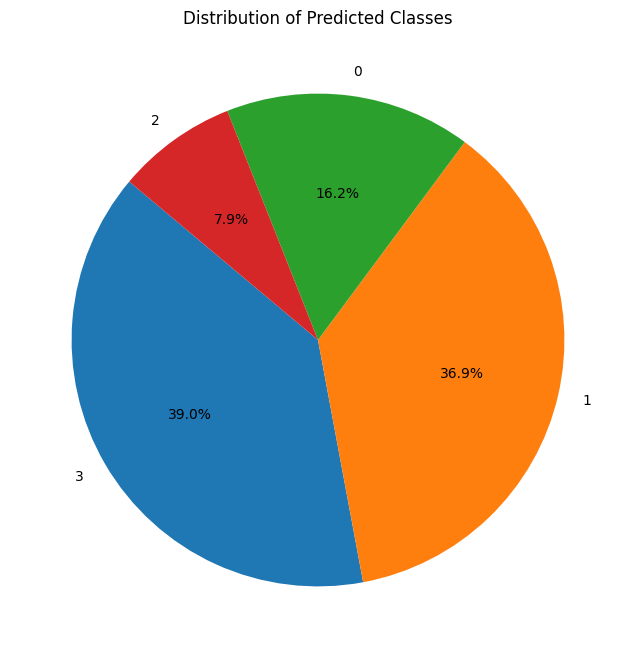

In [ ]:
import matplotlib.pyplot as plt

class_counts = pd.Series(y_pred).value_counts()

plt.figure(figsize=(8, 8))
class_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Predicted Classes')
plt.ylabel('')
plt.show()


In [ ]:
def fn(s):
  x=preprocess_sentiment(s)
  x=remove_pattern(x)
  x=get_text_vector(x)
  return x


In [ ]:
 rfclassifier.predict(fn("i ate").reshape(1, -1))

array([2])